In [ ]:
import httpx
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px
import nest_asyncio
import pyvips


def load_tile_from_file(file_path: Path, left: int, top: int, width: int, height: int) -> bytes:
    """Load a tile from a local image file."""
    image: pyvips.Image = pyvips.Image.new_from_file(str(file_path), access='sequential')
    tile = image.crop(left, top, width, height)
    return tile.write_to_buffer('.png')

## Power-law noise generating snippet

for explainability purposes

0.0 181.01933598375618


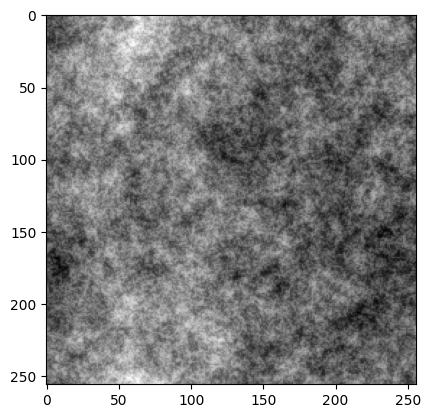

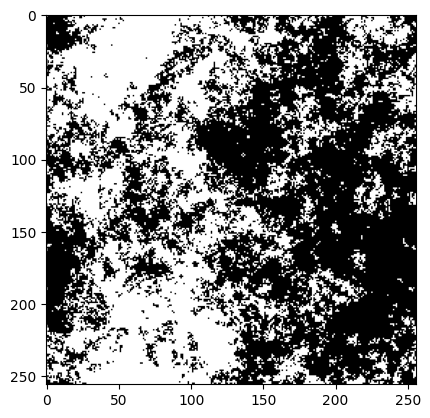

In [7]:
import numpy as np
import matplotlib.pyplot as plt

whitenoise = np.random.uniform(0, 1, (256, 256))
ft_arr = np.fft.fftshift(np.fft.fft2(whitenoise))
_x, _y = np.mgrid[0:ft_arr.shape[0], 0:ft_arr.shape[1]]
f = np.hypot(_x - ft_arr.shape[0] / 2, _y - ft_arr.shape[1] / 2)
print(np.min(f), np.max(f))
nzi = f != 0.0
ft_arr[nzi] /= f[nzi]
# pink_ft_arr = np.nan_to_num(pink_ft_arr, nan=0, posinf=0, neginf=0)
pinknoise = np.fft.ifft2(np.fft.ifftshift(ft_arr)).real

plt.imshow(pinknoise, cmap='gray')
plt.show()

plt.imshow(pinknoise>0.5, cmap='gray')
plt.show()


Large image size: 7879x5645
['You are searching for clues in a large image. You can only request to see parts of the image by specifying their relative bounding boxes.', 'To request a patch, use request in the form {MQ_REGION_REQUEST|optional id keyword}{x}{y}{w}{h}. Values are fractions (0.0-1.0) of the full image dimensions. x,y are measured from TOP-LEFT corner and w,h are width and height of the requested patch.', 'Each value in your requests must be enclosed in curly braces.', 'I will respond with image patches scaled so their larger side is at most 256 px, so you have to request smaller regions to see more detail. In your response, describe what you see in each patch. Try to ask for only a few patches at a time to keep the context size manageable.', 'When you are confident you know the answer, reply with: {MQ_WALDO_POS|optional id keyword}{x}{y} giving the RELATIVE CENTER (0-1).', 'Your goal is to find a yellow car which is being stolen. If you answer incorrectly, I will tell you

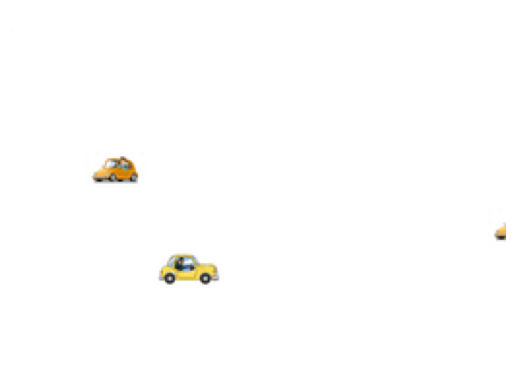

Invalid REGION_REQUEST for top_right: Requested pixel region exceeds image bounds
Requested patch bottom_left: (x=0.0, y=0.5, w=0.5, h=0.5), scale=0.0650


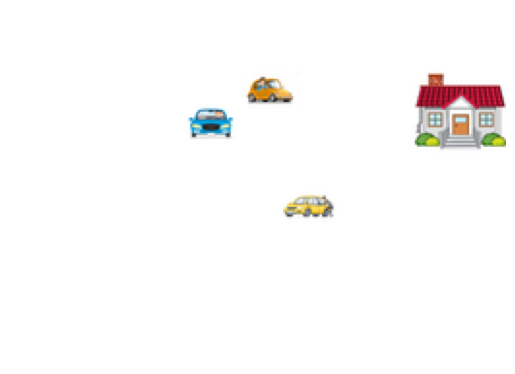

Invalid REGION_REQUEST for bottom_right: Requested pixel region exceeds image bounds
...advancing to iteration 3
['Patch top_left:', BinaryContent(data=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x00\x00\x00\x00\xb7\x08\x02\x00\x00\x00r\xa8\x17H\x00\x00\x00\tpHYs\x00\x00\x0e\xc4\x00\x00\x0e\xc4\x01\x95+\x0e\x1b\x00\x00\x00\xb4eXIfII*\x00\x08\x00\x00\x00\x06\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00V\x00\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00^\x00\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00\x13\x02\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00f\x00\x00\x00\x00\x00\x00\x00\x00w\x01\x00\xe8\x03\x00\x00\x00w\x01\x00\xe8\x03\x00\x00\x06\x00\x00\x90\x07\x00\x04\x00\x00\x000210\x01\x91\x07\x00\x04\x00\x00\x00\x01\x02\x03\x00\x00\xa0\x07\x00\x04\x00\x00\x000100\x01\xa0\x03\x00\x01\x00\x00\x00\xff\xff\x00\x00\x02\xa0\x04\x00\x01\x00\x00\x00\x00\x01\x00\x00\x03\xa0\x04\x00\x01\x00\x00\x00\xb7\x00\x00\x00\x00\x00\x00

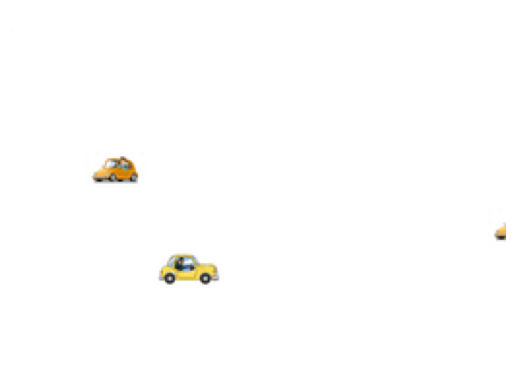

Invalid REGION_REQUEST for top_right: Requested pixel region exceeds image bounds
Requested patch bottom_left: (x=0, y=0.5, w=0.5, h=0.5), scale=0.0650


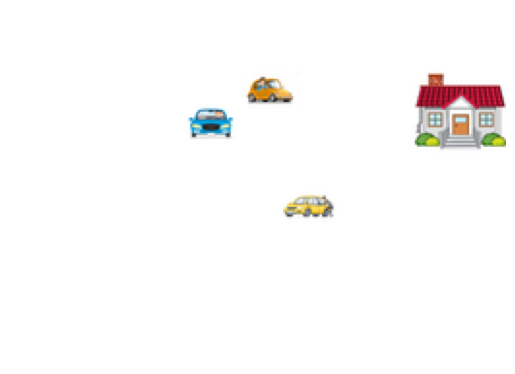

Invalid REGION_REQUEST for bottom_right: Requested pixel region exceeds image bounds
...advancing to iteration 6
['Patch top_left:', BinaryContent(data=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x00\x00\x00\x00\xb7\x08\x02\x00\x00\x00r\xa8\x17H\x00\x00\x00\tpHYs\x00\x00\x0e\xc4\x00\x00\x0e\xc4\x01\x95+\x0e\x1b\x00\x00\x00\xb4eXIfII*\x00\x08\x00\x00\x00\x06\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00V\x00\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00^\x00\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00\x13\x02\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00f\x00\x00\x00\x00\x00\x00\x00\x00w\x01\x00\xe8\x03\x00\x00\x00w\x01\x00\xe8\x03\x00\x00\x06\x00\x00\x90\x07\x00\x04\x00\x00\x000210\x01\x91\x07\x00\x04\x00\x00\x00\x01\x02\x03\x00\x00\xa0\x07\x00\x04\x00\x00\x000100\x01\xa0\x03\x00\x01\x00\x00\x00\xff\xff\x00\x00\x02\xa0\x04\x00\x01\x00\x00\x00\x00\x01\x00\x00\x03\xa0\x04\x00\x01\x00\x00\x00\xb7\x00\x00\x00\x00\x00\x00

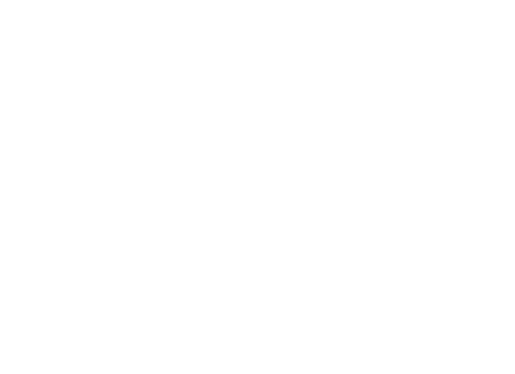

...advancing to iteration 10
['Patch optional id keyword:', BinaryContent(data=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x00\x00\x00\x00\xb7\x08\x02\x00\x00\x00r\xa8\x17H\x00\x00\x00\tpHYs\x00\x00\x0e\xc4\x00\x00\x0e\xc4\x01\x95+\x0e\x1b\x00\x00\x00\xb4eXIfII*\x00\x08\x00\x00\x00\x06\x00\x12\x01\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00\x1a\x01\x05\x00\x01\x00\x00\x00V\x00\x00\x00\x1b\x01\x05\x00\x01\x00\x00\x00^\x00\x00\x00(\x01\x03\x00\x01\x00\x00\x00\x02\x00\x00\x00\x13\x02\x03\x00\x01\x00\x00\x00\x01\x00\x00\x00i\x87\x04\x00\x01\x00\x00\x00f\x00\x00\x00\x00\x00\x00\x00\x00w\x01\x00\xe8\x03\x00\x00\x00w\x01\x00\xe8\x03\x00\x00\x06\x00\x00\x90\x07\x00\x04\x00\x00\x000210\x01\x91\x07\x00\x04\x00\x00\x00\x01\x02\x03\x00\x00\xa0\x07\x00\x04\x00\x00\x000100\x01\xa0\x03\x00\x01\x00\x00\x00\xff\xff\x00\x00\x02\xa0\x04\x00\x01\x00\x00\x00\x00\x01\x00\x00\x03\xa0\x04\x00\x01\x00\x00\x00\xb7\x00\x00\x00\x00\x00\x00\x00\xadB\xf0\x94\x00\x00\x01\xfbIDATx\x9c\xed\xd31\x01\x00\x00\x08\x800\

In [ ]:
from search import iterative_search_in_image
from pydantic_ai import Agent, BinaryContent
from pydantic_ai.models.openai import OpenAIResponsesModelSettings, OpenAIChatModel
from pydantic_ai.providers.openai import OpenAIProvider
import matplotlib.pyplot as plt
import pyvips
from pathlib import Path
import logging
import nest_asyncio
nest_asyncio.apply()

# logging.basicConfig(level=logging.DEBUG)


model = OpenAIChatModel(
    'mistral-small3.2:24b-instruct-2506-q8_0',
    provider=OpenAIProvider(
        base_url='https://chat.ai.e-infra.cz/api',
        api_key=Path('api_key').read_text().strip()
    ),
)

agent = Agent(model)

large_image = pyvips.Image.new_from_file( Path('IMG') / 'cars.jpg', access='random')

# plt.imshow(large_image.affine((0.01, 0 ,0, 0.01)))
# plt.show()
# raise Exception("--- IGNORE ---")

@agent.tool_plain
def load_tile(left: float, top: float, width: float, height: float) -> BinaryContent:
    """Load a tile from a local image file.
    
    """
    image: pyvips.Image = pyvips.Image.new_from_file( Path('IMG') / 'cars.jpg', access='sequential')
    tile = image.crop(int(left), int(top), int(width), int(height))
    tile_bytes = tile.write_to_buffer('.png')
    return BinaryContent(data=tile_bytes, media_type='image/png')

search_target_image = BinaryContent(data=Path('IMG/waldo_small.png').read_bytes(), media_type='image/png')
guesses, ROIs = iterative_search_in_image(
    agent=agent,
    image_to_search=large_image, 
    search_target_image=search_target_image, 
    true_pos_px=(473, 1550), 
    max_iters=10, 
    verbose=True
)

